In [1]:
import numpy as np
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import train_test_split
# import random
# from sklearn.metrics import log_loss
# from math import exp
# import xgboost as xgb
# from XGBoostPackage import xgbClass
# from CrossValidation import CVScore
# # from difflib import SequenceMatcher
# import editdistance
%matplotlib inline
#from time import time
import time

In [2]:
X_train = pd.read_json("../input/train.json")
X_test = pd.read_json("../input/test.json")
X_train.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [ ]:
# rg.search([X_train.iloc[0]['latitude'],X_train.iloc[0]['longitude']])
# df=pd.DataFrame()
# df['borough']=\
#    X_train[:10].apply(lambda x: rg.search([x['latitude'],x['longitude']])[0]['name'],axis=1)
# df

In [ ]:
# MTA_info=pd.read_table("subway_stations.txt")

In [ ]:
# MTA=pd.DataFrame()
# MTA['latitude']=MTA_info[MTA_info.columns[0]].apply(lambda x: float(str(x).split(',')[3])).unique()
# MTA['longitude']=MTA_info[MTA_info.columns[0]].apply(lambda x: float(str(x).split(',')[4])).unique()
# MTA
#MTA_info=MTA_info[['latitude','longitude']]

In [12]:
import reverse_geocoder as rg

In [13]:
def printData(X=X_train, name='train',MTA=MTA):
    t0=time.time()
    df=pd.DataFrame()
    df['city']=X[:].apply(lambda x: rg.search([x['latitude'],x['longitude']])[0]['name'],axis=1)
    print(time.time()-t0)
    df.to_csv("city_"+name+".csv", index = False, header = True)
X=X_train[['latitude','longitude']]
printData(X,'train')

Loading formatted geocoded file...
10129.6259379


In [ ]:
X=X_test[['latitude','longitude']]
printData(X,'test')

In [12]:
# x=[1,2]
# MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()

In [11]:
# def printData(X=X_train, name='train',MTA=MTA):
#     t0=time()
#     df=pd.DataFrame()
#     df['borough']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])).split(', ')[2],axis=1)
#     df['county']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])).split(', ')[3],axis=1)
#     def dist_to_subway(x):
#         return MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()
#     df['dist_to_subway']=X[:].apply(lambda x: dist_to_subway([x['latitude'],x['longitude']]),axis=1)
#     print(time()-t0)
#     df.to_csv("Borough_County_"+name+".csv", index = False, header = True)
# X=X_train[['latitude','longitude']]
# printData(X,'train')


KeyboardInterrupt: 

In [8]:
# type(geolocator.reverse([X_train.loc[10,'latitude'],X_train.loc[10,'longitude']]).address)

In [11]:
# pd.DataFrame(columns=['borough','county']).to_csv("Borough_County_"+'train'+".csv", index = False, header = True)

In [3]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [6]:
def printData(X=X_train, name='train', n0=0, n1=1000):
    t0=time.time()
    df=pd.DataFrame()
    df['tmpStr']=X[n0:n1].\
    apply(lambda x: geolocator.reverse([x['latitude'],x['longitude']]).address,axis=1)
    df['borough']=df['tmpStr'].apply(lambda x: x.encode('utf-8').split(', ')[2].strip().lower())
    df['county']=df['tmpStr'].apply(lambda x: x.encode('utf-8').split(', ')[3].strip().lower())
    del df['tmpStr']
#     def dist_to_subway(x):
#         return MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()
    #df['dist_to_subway']=X[:].apply(lambda x: dist_to_subway([x['latitude'],x['longitude']]),axis=1)
    print(n0, n1, time.time()-t0)
#     df.to_csv("Borough_County_"+name+".csv", index = False, header = True)
    return df

X=X_train[['latitude','longitude']]
# printData(X,'train')

df=pd.read_csv('Borough_County_train.csv')
n=100
for n0 in np.arange(0,2000,n):
    df=pd.concat([df,printData(X=X, name='train', n0=n0, n1=n0+n)])
    time.sleep(10)
df.to_csv("Borough_County_"+'train'+".csv", index = False, header = True)    
    
# X=X_test[['latitude','longitude']]
# printData(X,'test')

GeocoderServiceError: ('HTTP Error 429: Too Many Requests', u'occurred at index 10')

In [20]:
def printData(X=X_train, name='train',MTA=MTA):
    t0=time()
    df=pd.DataFrame()
#     df['tmpStr']=X[:].apply(lambda x: str(geolocator.reverse([x['latitude'],x['longitude']])),axis=1)
#     df['borough']=df['tmpStr'].apply(lambda x: x.split(', ')[2])
#     df['county']=df['tmpStr'].apply(lambda x: x.split(', ')[3])
#     del df['tmpStr']
    def dist_to_subway(x):
        return MTA.apply(lambda y: np.sqrt((y['latitude']-x[0])**2+(y['longitude']-x[1])**2),axis=1).min()
    df['dist_to_subway']=X[:].apply(lambda x: dist_to_subway([x['latitude'],x['longitude']]),axis=1)
    print(time()-t0)
    df.to_csv("dist_to_subway_"+name+".csv", index = False, header = True)
X=X_train[['latitude','longitude']]
printData(X,'train')
X=X_test[['latitude','longitude']]
printData(X,'test')

799.748290062
1332.52115083


In [7]:
tmpdf=pd.read_csv('dist_to_subway_train.csv')
tmpdf.describe()

,dist_to_subway
count,49352.000000
mean,0.027349
std,1.334583
min,0.000046
25%,0.002015
50%,0.003236
75%,0.005195
max,84.193492


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126676a50>]], dtype=object)

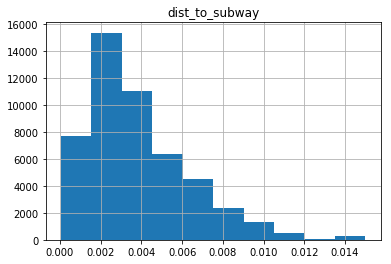

In [10]:
tmpdf.clip_upper(.015).hist()